In [ ]:
# Dataset link: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense,Flatten,Dropout
import matplotlib.pyplot as plt

In [2]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/train",
    shuffle = True,
    seed = 16,
    image_size = (224, 224),
    batch_size = 32
)

Found 20000 files belonging to 2 classes.


In [3]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/test",
    shuffle = True,
    seed = 16,
    image_size = (224, 224),
    batch_size = 32
)

Found 5000 files belonging to 2 classes.


In [4]:
class_names = training_ds.class_names
class_names

['cats', 'dogs']

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [6]:
# Load the dataset
# Make sure you have loaded the training and testing datasets as 'training_ds' and 'testing_ds' respectively.

# Preprocess the dataset for VGG16 (Rescale and resize)
preprocess_input = tf.keras.applications.resnet50.preprocess_input
training_ds = training_ds.map(lambda x, y: (preprocess_input(x), y))
testing_ds = testing_ds.map(lambda x, y: (preprocess_input(x), y))

# Load the VGG16 model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training dataset
epochs = 5  # Adjust the number of epochs as needed
model.fit(training_ds, epochs=epochs, validation_data=testing_ds)


Epoch 1/5
625/625 [==============================] - 71s 96ms/step - loss: 0.6833 - accuracy: 0.9771 - val_loss: 0.0368 - val_accuracy: 0.9866
Epoch 2/5
625/625 [==============================] - 59s 93ms/step - loss: 0.0198 - accuracy: 0.9947 - val_loss: 0.0388 - val_accuracy: 0.9874
Epoch 3/5
625/625 [==============================] - 61s 97ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0624 - val_accuracy: 0.9860
Epoch 4/5
625/625 [==============================] - 62s 99ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0744 - val_accuracy: 0.9876
Epoch 5/5
625/625 [==============================] - 62s 97ms/step - loss: 0.0631 - accuracy: 0.9933 - val_loss: 0.1047 - val_accuracy: 0.9892


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

1/1 [==============================] - 0s 26ms/step


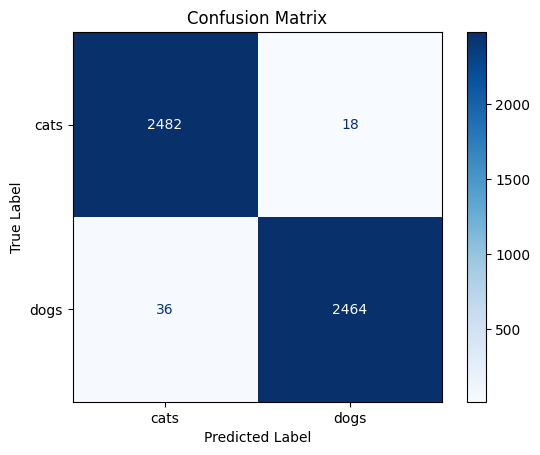

In [9]:
# Assuming you have model predictions and true labels in binary_predictions and true_labels variables respectively.
# binary_predictions and true_labels should be numpy arrays.
true_labels = []
binary_predictions = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    binary_predictions.extend((predictions > 0.5).astype(int).flatten())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
